In [24]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [25]:
dataset = pd.read_csv("./pamap_features.csv", index_col = 0)

In [26]:
dataset['activityID'].value_counts()

0     929661
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: activityID, dtype: int64

In [27]:
dataset['heartrate'] = dataset['heartrate'].fillna(dataset['heartrate'].mean())
dataset = dataset.dropna()
dataset.isna().sum()

dataset['activityID'].value_counts()

dataset.columns
col = dataset.columns.drop(['timestamp', 'activityID', 'heartrate', 'subject_id', 
                      'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                      'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                      'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
                      'handTemperature', 'chestTemperature', 'ankleTemperature',
                      'subject_id'])

In [28]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

X = dataset[col]
y= dataset['activityID']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = col)
scaled_X['label'] = y.values

scaled_X
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = col)
scaled_X['label'] = y.values

scaled_X.head(10)

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,label
0,1.224895,0.799466,0.087944,1.222699,0.856035,0.000235,-0.068503,0.028096,-0.006246,-0.269436,...,0.025797,-0.240078,0.739314,0.001341,0.070493,-0.011664,-1.507237,-1.875621,-3.689774,0
1,1.194172,0.793859,0.127324,1.215255,0.821161,0.075099,-0.016169,0.017868,0.009152,-0.260341,...,0.020130,-0.249625,0.729901,-0.012571,0.047067,-0.001840,-1.436290,-1.872474,-3.708535,0
2,1.225119,0.799518,0.097964,1.200268,0.818784,0.098732,-0.042074,0.000714,-0.000136,-0.287695,...,0.022951,-0.244854,0.729845,-0.003602,0.055140,0.010271,-1.483284,-1.896626,-3.702368,0
3,1.175183,0.787945,0.126912,1.205298,0.818747,0.098724,0.000859,0.000980,0.002100,-0.260686,...,0.022996,-0.251998,0.748941,-0.003452,0.020646,0.004130,-1.465983,-1.866532,-3.702157,0
4,1.201022,0.836238,0.137268,1.187819,0.828869,0.106585,0.012144,-0.015408,-0.032104,-0.232779,...,0.025816,-0.254382,0.748931,0.005454,0.030764,-0.003586,-1.524755,-1.895427,-3.695951,0
5,1.212757,0.835930,0.097475,1.192954,0.838828,0.110474,0.005174,-0.022237,-0.032897,-0.237137,...,0.025793,-0.249618,0.739375,-0.012115,0.027861,-0.001467,-1.459967,-1.871821,-3.702260,0
6,1.219072,0.835883,0.097623,1.195576,0.858786,0.098602,-0.015622,-0.071697,-0.028349,-0.251120,...,0.031456,-0.249610,0.748850,-0.036321,-0.036086,0.006494,-1.477708,-1.871349,-3.696034,0
7,1.224760,0.871941,0.057491,1.215742,0.878612,0.074901,0.017393,-0.060948,-0.018528,-0.260640,...,0.028601,-0.249620,0.734588,-0.024791,-0.012476,-0.002471,-1.471697,-1.876639,-3.696142,0
8,1.219428,0.884307,0.097365,1.223395,0.893543,0.070903,0.021847,-0.096028,-0.003026,-0.273753,...,0.031473,-0.235298,0.753521,0.006435,0.037951,0.007647,-1.512676,-1.906085,-3.690074,0
9,1.206085,0.878187,0.067038,1.220901,0.898555,0.066957,0.008561,-0.101344,-0.008475,-0.260149,...,0.025817,-0.247226,0.748885,0.000733,0.031404,0.005894,-1.489358,-1.881276,-3.689971,0


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [30]:
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [31]:
unique, counts = np.unique(y_train, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(y_test, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T) 

Train data label statistics::
[[     0 692581]
 [     1 143867]
 [     2 138404]
 [     3 141896]
 [     4 172563]
 [     5  71683]
 [     6 122319]
 [     7 138252]
 [    12  87783]
 [    13  78691]
 [    16 131389]
 [    17 178662]
 [    24  35561]]
Test data label statistics::
[[     0 230856]
 [     1  48423]
 [     2  46241]
 [     3  47088]
 [     4  57146]
 [     5  23958]
 [     6  40983]
 [     7  46192]
 [    12  29311]
 [    13  26174]
 [    16  43587]
 [    17  59240]
 [    24  12018]]


In [32]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train, y_train = create_dataset(X_train[col], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[col], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

(2133650, 1, 36) (2133650, 1)


In [33]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

/Users/kimtaeyoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils



In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [36]:
verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [37]:
model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train.shape[1], X_train.shape[2]])))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(y_train.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [38]:
history = model.fit(X_train, y_train, epochs = 1, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

60009/60009 [==============================] - 157s 3ms/step - loss: 0.4922 - acc: 0.8300 - val_loss: 0.3008 - val_acc: 0.8862
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              168960    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 13)                1677      
                                                                 
Total params: 203,533
Trainable params: 203,533
Non-trainable params: 0
_____________________________________________________

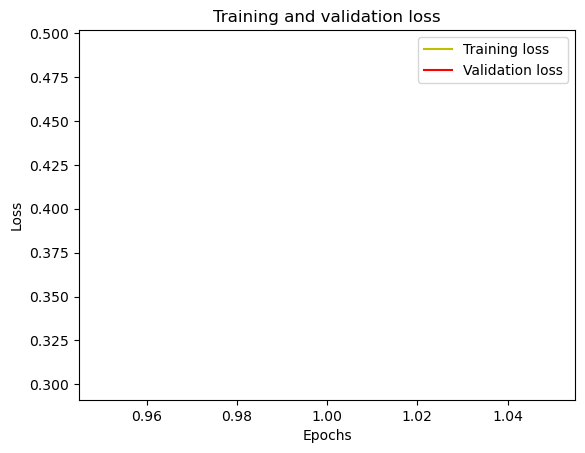

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

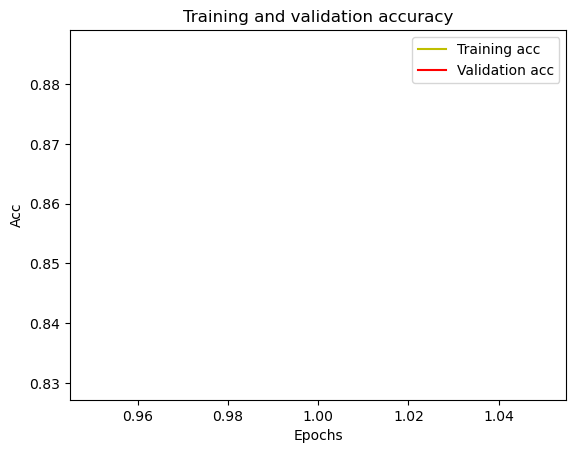

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [41]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

22226/22226 [==============================] - 26s 1ms/step


In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg = np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

22226/22226 [==============================] - 29s 1ms/step
Confusion Matrix
[[198925    958    576   1748  10688    526   1326   2749   4226   2380
    3714   2308    731]
 [  1668  46507    186      0      0      0      1      0      9      2
      50      0      0]
 [   665      2  44969    441      1      3      0      1      1      7
     150      1      0]
 [   792      0    188  45917      5      0      1      0      2      0
      43    140      0]
 [  4612      0      1     12  50923     33      8   1344    152     33
      13      3     12]
 [  1043      0      1      0     75  22712      4     52     29     19
       4      2     17]
 [  1101      0      0      0     29      8  39464     74     40     22
     227     14      4]
 [  1715      0      4      4    880     33      7  43471     36     11
      25      0      6]
 [  8012     16      6      4    679    133     75    355  19545    108
     293      1     84]
 [ 11089      6     16     14    401     84    165    163  